In [16]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn; seaborn.set()

## Hardware

In [17]:
leakage = 'HD'
traces1 = np.load(r'2016.09.28-13.01.25_traces.npy')
traces2 = np.load(r'2016.09.28-13.07.12_traces.npy')
traces3 = np.load(r'2016.09.28-13.13.11_traces.npy')
traces4 = np.load(r'2016.09.28-13.19.00_traces.npy')
traces5 = np.load(r'2016.09.28-13.25.04_traces.npy')
a = np.vstack((traces1,traces2))
b = np.vstack((a,traces3))
c = np.vstack((b,traces4))
traces = np.vstack((c,traces5))
traces.shape

(10000L, 396L)

In [18]:
ct1 = np.load(r'2016.09.28-13.01.25_textout.npy')
ct2 = np.load(r'2016.09.28-13.07.12_textout.npy')
ct3 = np.load(r'2016.09.28-13.13.11_textout.npy')
ct4 = np.load(r'2016.09.28-13.19.00_textout.npy')
ct5 = np.load(r'2016.09.28-13.25.04_textout.npy')
a = np.vstack((ct1,ct2))
b = np.vstack((a,ct3))
c = np.vstack((b,ct4))
ct = np.vstack((c,ct5))
ct.shape

(10000L, 16L)

In [19]:
keylist = np.load(r'2016.09.28-13.01.25_keylist.npy')
keylist[1800]

array([  0,   1,   2,   3,   4,   5,   6,   7,   8, 247,  21, 136,   9,
       207,  79,  60], dtype=uint8)

In [20]:
np.shape(pt)
np.shape(ct)

(10000L, 16L)

In [21]:
(numtraces,numpoint) = np.shape(traces)
np.shape(traces)

(10000L, 396L)

需經 key schedule! 推到最後一把key

In [22]:
knownkey = np.load(r'2016.09.28-13.01.25_knownkey.npy')
knownkey

array([  0,   1,   2,   3,   4,   5,   6,   7,   8, 247,  21, 136,   9,
       207,  79,  60], dtype=uint8)

In [23]:
from chipwhisperer.analyzer.models.aes.key_schedule import keyScheduleRounds
totalrndstr = ""
for r in range(0, 10+1):
    result = keyScheduleRounds(knownkey, 0, r)
    rstr = ["%02x" % t for t in result]
    print rstr
    if r == 10:
        roundkey = rstr

['00', '01', '02', '03', '04', '05', '06', '07', '08', 'f7', '15', '88', '09', 'cf', '4f', '3c']
['8b', '85', 'e9', '02', '8f', '80', 'ef', '05', '87', '77', 'fa', '8d', '8e', 'b8', 'b5', 'b1']
['e5', '50', '21', '1b', '6a', 'd0', 'ce', '1e', 'ed', 'a7', '34', '93', '63', '1f', '81', '22']
['21', '5c', 'b2', 'e0', '4b', '8c', '7c', 'fe', 'a6', '2b', '48', '6d', 'c5', '34', 'c9', '4f']
['31', '81', '36', '46', '7a', '0d', '4a', 'b8', 'dc', '26', '02', 'd5', '19', '12', 'cb', '9a']
['e8', '9e', '8e', '92', '92', '93', 'c4', '2a', '4e', 'b5', 'c6', 'ff', '57', 'a7', '0d', '65']
['94', '49', 'c3', 'c9', '06', 'da', '07', 'e3', '48', '6f', 'c1', '1c', '1f', 'c8', 'cc', '79']
['3c', '02', '75', '09', '3a', 'd8', '72', 'ea', '72', 'b7', 'b3', 'f6', '6d', '7f', '7f', '8f']
['6e', 'd0', '06', '35', '54', '08', '74', 'df', '26', 'bf', 'c7', '29', '4b', 'c0', 'b8', 'a6']
['cf', 'bc', '22', '86', '9b', 'b4', '56', '59', 'bd', '0b', '91', '70', 'f6', 'cb', '29', 'd6']
['e6', '19', 'd4', 'c4', '7d',

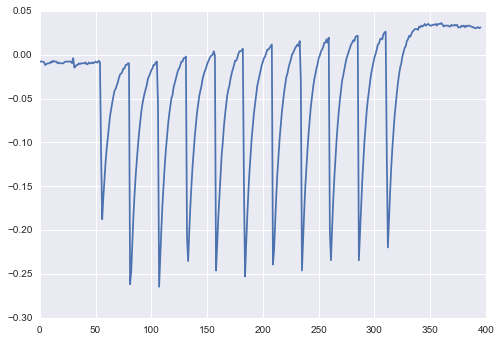

In [24]:
plt.plot(traces[8000])

## Software

In [ ]:
tracez = np.load(r'2013.11.14-12.33.38_traces.npz')
traces = tracez['arr_0']
leakage = 'HW'

In [ ]:
pt = np.load(r'2013.11.14-12.33.38_textin.npy')
knownkey = np.load(r'2013.11.14-12.33.38_knownkey.npy')
knownkey

In [ ]:
np.shape(pt)

In [ ]:
(numtraces,numpoint) = np.shape(traces)
numtraces = numtraces-1
np.shape(traces)

In [ ]:
plt.plot(traces[8000])

## Model

In [25]:
sbox=(
    0x63,0x7c,0x77,0x7b,0xf2,0x6b,0x6f,0xc5,0x30,0x01,0x67,0x2b,0xfe,0xd7,0xab,0x76,
    0xca,0x82,0xc9,0x7d,0xfa,0x59,0x47,0xf0,0xad,0xd4,0xa2,0xaf,0x9c,0xa4,0x72,0xc0,
    0xb7,0xfd,0x93,0x26,0x36,0x3f,0xf7,0xcc,0x34,0xa5,0xe5,0xf1,0x71,0xd8,0x31,0x15,
    0x04,0xc7,0x23,0xc3,0x18,0x96,0x05,0x9a,0x07,0x12,0x80,0xe2,0xeb,0x27,0xb2,0x75,
    0x09,0x83,0x2c,0x1a,0x1b,0x6e,0x5a,0xa0,0x52,0x3b,0xd6,0xb3,0x29,0xe3,0x2f,0x84,
    0x53,0xd1,0x00,0xed,0x20,0xfc,0xb1,0x5b,0x6a,0xcb,0xbe,0x39,0x4a,0x4c,0x58,0xcf,
    0xd0,0xef,0xaa,0xfb,0x43,0x4d,0x33,0x85,0x45,0xf9,0x02,0x7f,0x50,0x3c,0x9f,0xa8,
    0x51,0xa3,0x40,0x8f,0x92,0x9d,0x38,0xf5,0xbc,0xb6,0xda,0x21,0x10,0xff,0xf3,0xd2,
    0xcd,0x0c,0x13,0xec,0x5f,0x97,0x44,0x17,0xc4,0xa7,0x7e,0x3d,0x64,0x5d,0x19,0x73,
    0x60,0x81,0x4f,0xdc,0x22,0x2a,0x90,0x88,0x46,0xee,0xb8,0x14,0xde,0x5e,0x0b,0xdb,
    0xe0,0x32,0x3a,0x0a,0x49,0x06,0x24,0x5c,0xc2,0xd3,0xac,0x62,0x91,0x95,0xe4,0x79,
    0xe7,0xc8,0x37,0x6d,0x8d,0xd5,0x4e,0xa9,0x6c,0x56,0xf4,0xea,0x65,0x7a,0xae,0x08,
    0xba,0x78,0x25,0x2e,0x1c,0xa6,0xb4,0xc6,0xe8,0xdd,0x74,0x1f,0x4b,0xbd,0x8b,0x8a,
    0x70,0x3e,0xb5,0x66,0x48,0x03,0xf6,0x0e,0x61,0x35,0x57,0xb9,0x86,0xc1,0x1d,0x9e,
    0xe1,0xf8,0x98,0x11,0x69,0xd9,0x8e,0x94,0x9b,0x1e,0x87,0xe9,0xce,0x55,0x28,0xdf,
    0x8c,0xa1,0x89,0x0d,0xbf,0xe6,0x42,0x68,0x41,0x99,0x2d,0x0f,0xb0,0x54,0xbb,0x16)

def intermediate(pt, keyguess):
    return sbox[pt ^ keyguess]

HW = [bin(n).count("1") for n in range(0,256)]

In [26]:
INVSHIFT = [0, 5, 10, 15, 4, 9, 14, 3, 8, 13, 2, 7, 12, 1, 6, 11]

inv_sbox=(
0x52,0x09,0x6a,0xd5,0x30,0x36,0xa5,0x38,0xbf,0x40,0xa3,0x9e,0x81,0xf3,0xd7,0xfb,
0x7c,0xe3,0x39,0x82,0x9b,0x2f,0xff,0x87,0x34,0x8e,0x43,0x44,0xc4,0xde,0xe9,0xcb,
0x54,0x7b,0x94,0x32,0xa6,0xc2,0x23,0x3d,0xee,0x4c,0x95,0x0b,0x42,0xfa,0xc3,0x4e,
0x08,0x2e,0xa1,0x66,0x28,0xd9,0x24,0xb2,0x76,0x5b,0xa2,0x49,0x6d,0x8b,0xd1,0x25,
0x72,0xf8,0xf6,0x64,0x86,0x68,0x98,0x16,0xd4,0xa4,0x5c,0xcc,0x5d,0x65,0xb6,0x92,
0x6c,0x70,0x48,0x50,0xfd,0xed,0xb9,0xda,0x5e,0x15,0x46,0x57,0xa7,0x8d,0x9d,0x84,
0x90,0xd8,0xab,0x00,0x8c,0xbc,0xd3,0x0a,0xf7,0xe4,0x58,0x05,0xb8,0xb3,0x45,0x06,
0xd0,0x2c,0x1e,0x8f,0xca,0x3f,0x0f,0x02,0xc1,0xaf,0xbd,0x03,0x01,0x13,0x8a,0x6b,
0x3a,0x91,0x11,0x41,0x4f,0x67,0xdc,0xea,0x97,0xf2,0xcf,0xce,0xf0,0xb4,0xe6,0x73,
0x96,0xac,0x74,0x22,0xe7,0xad,0x35,0x85,0xe2,0xf9,0x37,0xe8,0x1c,0x75,0xdf,0x6e,
0x47,0xf1,0x1a,0x71,0x1d,0x29,0xc5,0x89,0x6f,0xb7,0x62,0x0e,0xaa,0x18,0xbe,0x1b,
0xfc,0x56,0x3e,0x4b,0xc6,0xd2,0x79,0x20,0x9a,0xdb,0xc0,0xfe,0x78,0xcd,0x5a,0xf4,
0x1f,0xdd,0xa8,0x33,0x88,0x07,0xc7,0x31,0xb1,0x12,0x10,0x59,0x27,0x80,0xec,0x5f,
0x60,0x51,0x7f,0xa9,0x19,0xb5,0x4a,0x0d,0x2d,0xe5,0x7a,0x9f,0x93,0xc9,0x9c,0xef,
0xa0,0xe0,0x3b,0x4d,0xae,0x2a,0xf5,0xb0,0xc8,0xeb,0xbb,0x3c,0x83,0x53,0x99,0x61,
0x17,0x2b,0x04,0x7e,0xba,0x77,0xd6,0x26,0xe1,0x69,0x14,0x63,0x55,0x21,0x0c,0x7d)


## Correlation Power Analysis

In [27]:
#Set 16 to something lower (like 1) to only go through a single subkey
bestguess = [0]*16
pge = [256]*16


for bnum in range(0, 3):
    cpaoutput = [0]*256
    maxcpa = [0]*256
    for kguess in range(0, 256):
       # print "Subkey %2d, hyp = %02x: "%(bnum, kguess),


        #Initialize arrays & variables to zero
        sumnum = np.zeros(numpoint)
        sumden1 = np.zeros(numpoint)
        sumden2 = np.zeros(numpoint)

        hyp = np.zeros(numtraces)
        for tnum in range(numtraces):
            if leakage == 'HW':
                hyp[tnum] = HW[intermediate(pt[tnum][bnum], kguess)]
            elif leakage == 'HD':
                st10 = ct[tnum][INVSHIFT[bnum]]
                st9 =  inv_sbox[ct[tnum][bnum] ^ kguess]
                hyp[tnum] = HW[st9 ^ st10]
            else:
                print "leakage is not defined"


        #Mean of hypothesis
        meanh = np.mean(hyp, dtype=np.float64)

        #Mean of all points in trace
        meant = np.mean(traces, axis=0, dtype=np.float64)

        #For each trace, do the following
        for tnum in range(0, numtraces):
            hdiff = (hyp[tnum] - meanh)
            tdiff = traces[tnum,:] - meant

            sumnum = sumnum + (hdiff*tdiff)
            sumden1 = sumden1 + hdiff*hdiff
            sumden2 = sumden2 + tdiff*tdiff
        
        cpaoutput[kguess] = sumnum / np.sqrt( sumden1 * sumden2 )
        maxcpa[kguess] = max(abs(cpaoutput[kguess]))

        print maxcpa[kguess]

    #Find maximum value of key
    bestguess[bnum] = np.argmax(maxcpa)

    cparefs = np.argsort(maxcpa)[::-1]

    #Find PGE
    pge[bnum] = list(cparefs).index(knownkey[bnum])

print "Best Key Guess: ",
for b in bestguess: print "%02x "%b,

print ""
print "PGE: ",
for b in pge: print "%02d "%b,

0.0301727458473
0.0252446973496
0.0268653634616
0.0318580363302
0.0266908084084
0.0284857463675
0.0362796794929
0.0216670627447
0.0357352085467
0.0319796402686
0.0254451191346
0.0304645128182
0.0284462683738
0.0300774572545
0.032861360876
0.0235395924943
0.02767389482
0.0298332296121
0.0326586889542
0.0306552795438
0.0332824467527
0.0223428375254
0.0250067237305
0.0301598872339
0.0243710642988
0.0265088771354
0.0243188421822
0.0288809559341
0.0286116184841
0.0239633476331
0.0233564483895
0.0283896240779
0.0257160819038
0.0298815985626
0.0269590950373
0.0282402101489
0.0345868205471
0.0308865624737
0.0328189249329
0.0337990607749
0.0284684135453
0.0330671916089
0.0280244252923
0.0262588448998
0.0281271875677
0.0281281917728
0.0203044918528
0.0303601514368
0.032328283816
0.0253964323417
0.0222457426989
0.0248688092895
0.028848891239
0.0320621891094
0.0318776606015
0.029630199035
0.0261503936256
0.0362791790154
0.0349959565338
0.028338525756
0.0261281060709
0.0263527654169
0.0210391141488

## Empirical Success Rate

In [ ]:
runs = (numtraces-1)/100

In [ ]:
traces[100:105,:]

In [ ]:
#Set 16 to something lower (like 1) to only go through a single subkey
bestguess = [0]*16
pge = [256]*16
ySR = []
xSR = []



for bnum in range(0, 1):
    cpaoutput = [0]*256
    maxcpa = [0]*256
    
    #Initialize arrays & variables to zero
    sumnum = np.zeros(numpoint)
    sumden1 = np.zeros(numpoint)
    sumden2 = np.zeros(numpoint)

    hyp = np.zeros(100)
    #For each trace, do the following
    for tnum in range(0, 100):
        success = 0
        print "tnum:%2d"%tnum
        for run in range(runs):
            print "run:%2d"%run
            for kguess in range(0, 256):
                sumnum = np.zeros(numpoint)
                sumden1 = np.zeros(numpoint)
                sumden2 = np.zeros(numpoint)
                for ttnum in range(0, tnum):
                    hyp[i] = HW[intermediate(ptStr[sboxNum], subkey)]
                #Mean of hypothesis
                meanh = np.mean(hyp[0:tnum], dtype=np.float64)

                #Mean of all points in trace
                meant = np.mean(traces[run*100:run*100+tnum,:], axis=0, dtype=np.float64)
                for ttnum in range(0, tnum):
                    hdiff = (hyp[ttnum] - meanh)
                    tdiff = traces[run*100+ttnum,:] - meant

                    sumnum = sumnum + (hdiff*tdiff)
                    sumden1 = sumden1 + hdiff*hdiff
                    sumden2 = sumden2 + tdiff*tdiff

                cpaoutput[kguess] = sumnum / np.sqrt( sumden1 * sumden2 )
                maxcpa[kguess] = max(abs(cpaoutput[kguess]))
            # print(kguess)
            # print(maxcpa[kguess])
            bestguess[bnum] = np.argmax(maxcpa)
            #print(bestguess[bnum])
            if knownkey[bnum] == bestguess[bnum]:
                success += 1.0
        ySR.append(success/runs)
        print(success/runs)
        xSR.append(tnum)

In [ ]:
plt.plot(xSR,ySR)

## Theoratical Success Rate

In [ ]:
import des_block
import numpy.linalg
from util import *

In [ ]:
class AESConfusion():
    """
    This Class generates DES Confusion coefficients necessary for success rate simulation.
    """
    def __init__(self, sboxNum, leakage='HW'):
        self.NkAES = 2**7
        self.sboxNum = sboxNum
        self.leakage = leakage
        self.CPAConfusionCoefficients = self.AESCpaCC(sboxNum)  # CPA Confusion Co-efficients
        self.DPAConfusionCoefficients = self.AESDpaCC(sboxNum)  # DPA Confusion Co-efficients
        self.dpaCV = self.DPA_CV()  # DPA Confusion Vector for key = 0
        self.dpaK = self.DPA_K()    # DPA Confusion Matrix for key = 0
        self.cpaCV = self.CPA_CV()  # CPA Confusion Vector
        self.cpaK, self.cpaKs, self.cpaKss = self.CPA_K()    # CPA Confusion Matrix, K, K* and K**

    def YCovMeanDPA(self, signal, noise, Nm, correctKey=0):
        """
        This function calculates the mean and covariance matrix of the multivariate gaussian variable Y
        This is used directly in the Success class to calculate SR for DES DPA
        Refer to 'Statistical model for DPA with Confusion Analysis'
        # input:
          Signal and noise values
          Number of measurements (Nm)
          correctKey: (0...128) -- Note: Correct key does not matter because of symmetry
        # Return :
          covariance matrix of size [(Nk-1) x (Nk-1)]
          mean of size [(Nk-1) x 1]
        """

        Nk = self.NkAES
        if (correctKey != 0):
            cv = self.DPA_CV(correctKey = correctKey)  # Confusion Vector
            K = self.DPA_K(correctKey = correctKey)    # Confusion Matrix
        else:
            cv = self.dpaCV
            K = self.dpaK

        cov = np.zeros((Nk-1, Nk-1))
        mean = cv * 2 * signal
        for i in range(Nk-1):
            for j in range(Nk-1):
                ki = cv[0][i]
                kj = cv[0][j]
                cov[i][j] = ((16 * K[i][j] * (noise**2)) + (4 * (K[i][j] - (ki * kj)) *(signal**2)))/ Nm

        return cov, mean

    def YCovMeanCPA2(self, signal, noise, Nm, correctKey=0):
        """
        This method calculates the mean and covariance matrix of the multivariate guassian variable Y
        This is used directly in the Success class to calculate SR for DES CPA
        Refer to 'A Statistics-based Fundamental Model for Side-channel Attack Analysis'
        # input:
          Signal and noise values
          Number of measurements (Nm)
          correctKey: (0...127) -- Note: Correct key does not matter because of symmetry
        # Return :
          covariance matrix of size [(Nk-1) x (Nk-1)]
          mean of size [(Nk-1) x 1]
        """

        Nk = self.NkAES
        if (correctKey != 0):
            cv = self.CPA_CV(correctKey = correctKey)       # Confusion Vector
            K, Ks, Kss = self.CPA_K(correctKey = correctKey)     # Confusion Matrices K, K**
        else:
            cv = self.cpaCV
            K = self.cpaK
            Ks = self.cpaKs
            Kss = self.cpaKss
        cov = np.zeros((Nk-1, Nk-1))
        snr = signal / noise
        mean = 0.5 * (snr **2 ) * cv
        print np.shape(mean)
        for i in range(Nk-1):
            for j in range(Nk-1):
                ki = cv[0][i]
                kj = cv[0][j]
                #cov[i][j] = ((K[i][j] * (snr**2)) )/ Nm    # Simplified formula for low SNR
                cov[i][j] = ((K[i][j] * (snr**2)) + (0.25 * (Kss[i][j] - (ki * kj)) *(snr ** 4)))/ Nm
        return cov, mean

    def AESDpaCC(self, sboxNum, plot = False):
        """ Returns AES DPA Confusion coefficents Matrix of size [number of keys x number of keys]
        #inputs:
        sboxNum - the sbox number we are targeting (values 1 to 8)
        plot - if True, will plot the matrix as a histogram
        """
        numPT = 2 ** 7      # number of possible PT/CT
        numKey = 2 ** 7     # number of possible keys
        cc = np.zeros((numKey,numKey), np.float)    # Confusion Coefficient matrix
        histogram = []

        for ki in range(numKey):
            for kj in range(numKey):
                numNotEqual = 0
                for ptBlock in range(numPT):
                    sboxOuti = sbox[ptBlock ^ ki]
                    sboxOutj = sbox[ptBlock ^ kj]
                    if (self.msb(sboxOuti) != self.msb(sboxOutj)):
                        numNotEqual += 1.0
                coefficient = numNotEqual / numPT
                cc[ki][kj] = coefficient
                if (ki != kj and ki<kj):
                    histogram.append(coefficient)

        if (plot):
            # Plot a histogram of the coefficients
            weights = np.ones_like(histogram)/len(histogram)
            fig = plt.hist(histogram, 1000, weights=weights)
            plt.ylabel('Frequency')
            plt.xlabel('Confusion coefficient')
            plt.show(fig)
        return cc

    def AESCpaCC(self, sboxNum, plot = False, leakage ='HW'):
        """ Returns AES CPA 2-way Confusion coefficents Matrix of size [number of keys x number of keys]
        #inputs:
        sboxNum - the sbox number we are targeting (values 1 to 8)
        plot - if True, will plot the matrix as a histogram
        leakage - The leakage model. This takes values 'HW', 'HD', 'HDRound'
        """

        numPT = 2 ** 7      # number of possible PT/CT
        numKey = 2 ** 7     # number of possible keys
        cc = np.zeros((numKey,numKey), np.float)    # Confusion Coefficient matrix
        histogram = []

        for ki in range(numKey):
            for kj in range(numKey):
                numNotEqual = 0.0
                k = []
                for ptBlock in range(numPT):
                    sboxIni = ptBlock ^ ki
                    sboxInj = ptBlock ^ kj

                    sboxOuti = sbox[sboxIni]
                    sboxOutj = sbox[sboxInj]
                    if leakage =='HW':
                        k.append((self.hw(sboxOuti) - self.hw(sboxOutj)) ** 2)
                    if leakage =='HD':
                        k.append((HD(sboxOuti, sboxIni) - HD(sboxOutj,sboxInj)) ** 2)


                cc[ki][kj] = np.mean(k)
                if (ki != kj and ki<kj):
                    histogram.append(cc[ki][kj])

        if (plot):
            weights = np.ones_like(histogram)/len(histogram)
            fig = plt.hist(histogram, 1000, weights=weights)
            plt.ylabel('Frequency')
            plt.xlabel('Confusion coefficient')
            plt.show(fig)

        return cc

    def DPA_CV(self, correctKey=0):
        """ Return the DES DPA confusion vector of the correct Key. This is a Nk x1 matrix """
        Nk = self.NkAES
        cv = np.delete(self.DPAConfusionCoefficients[correctKey], correctKey)
        cv = cv.reshape(1, Nk-1)
        return cv

    def CPA_CV(self, correctKey=0):
        """ Return the AES CPA confusion vector of the correct Key. This is a Nk x1 matrix """
        Nk = self.NkAES
        cv = np.delete(self.CPAConfusionCoefficients[correctKey], correctKey)
        cv = cv.reshape(1, Nk-1)
        print np.shape(cv)
        return cv

    def DPA_K(self, correctKey=0):
        """ Returns the Nk-1 x Nk-1 Confusion matrix
        #input:
        correctKey - takes values (0...128)
        """
        Nk = self.NkAES
        cc2 = np.delete(self.DPAConfusionCoefficients, correctKey,0)
        cc2 = np.delete(cc2, correctKey,1)      # Tmp variable used to calculate the 3-way co-efficient
        cv = self.DPA_CV(correctKey = correctKey)
        K = np.zeros((Nk-1, Nk-1))

        for i in range(Nk-1):
            for j in range(Nk-1):
                if (i == j):
                    K[i][j] = cv[0][i]
                else:
                    ki = cv[0][i]
                    kj = cv[0][j]
                    kij = cc2[i][j]
                    kcij = 0.5 * (ki + kj - kij)    # 3 way confusion co-efficient
                    K[i][j] = kcij
        return K

    def CPA_K(self, correctKey=0, leakage='HW'):
        """Returns the 3-way CPA confusion matrix K, K* and K**
        (refer to "A Statistics-based Fundamental Model for Side-channel Attack Analysis.")

        #inputs:
        correctKey - takes values (0...127)
        leakage - the leakage model. Takes values 'HW' and 'HD'.
        """
        Nk = self.NkAES
        numPT = 2 ** 8
        sboxNum = self.sboxNum
        cv = self.CPA_CV(correctKey = correctKey) # Diagonal of the confusion matrix
        K = np.zeros((Nk, Nk))
        Ks = np.zeros((Nk, Nk))     # K*
        Kss = np.zeros((Nk, Nk))    # K**
        keys = np.arange(128)    # List of wrong keys
        keys = np.delete(keys, correctKey)

        evkc = []    # E [V | kc]
        for ptBlock in range(numPT):
            sboxOutc = sbox[ptBlock ^ correctKey]
            evkc.append(self.hw(sboxOutc))
        evkc = np.mean(evkc)
        #print evkc

        for i in keys:
            for j in keys:
                # Calculate kcij = E[(V|kc - V|ki) * (V|kc - V|ki)]
                # Calculate kcijss = E[4 * (V|kc - E[V|kc])^2 * (V|kc - V|ki) * (V|kc - V | kj)]
                kcij = []
                kcijs = []
                kcijss = []
                for ptBlock in range(numPT):
                    sboxOutc = sbox[ptBlock ^ correctKey]
                    sboxOuti = sbox[ptBlock ^ i]
                    sboxOutj = sbox[ptBlock ^ j]
                    if self.leakage =='HW':
                        vkc = self.hw(sboxOutc) # V | kc
                        vki = self.hw(sboxOuti) # V | ki
                        vkj = self.hw(sboxOutj) # V | kj
                    elif self.leakage =='HD':
                        vkc = HD(sboxOutc, correctKey^ptBlock) # V | kc
                        vki = HD(sboxOuti, i^ptBlock) # V | ki
                        vkj = HD(sboxOutj, j^ptBlock) # V | kj


                    kcij.append((vkc - vki) * (vkc -vkj))
                    kcijs.append(((vkc-vki)**2) * ((vkc-vkj)**2))
                    kcijss.append( 4 * ((vkc - evkc)**2) * (vkc - vki) * (vkc -vkj))
                kcij = np.mean(kcij)
                kcijss = np.mean(kcijss)
                kcijs = np.mean(kcijs)

                K[i][j] = kcij
                Ks[i][j] = kcijs
                Kss[i][j] = kcijs

        K = np.delete(K, correctKey,0)
        K = np.delete(K, correctKey,1)
        Ks = np.delete(Ks, correctKey,0)
        Ks = np.delete(Ks, correctKey,1)
        Kss = np.delete(Kss, correctKey,0)
        Kss = np.delete(Kss, correctKey,1)

        return K, Ks, Kss

    def hw(self, num):
        return bin(num).count("1")

    def lsb(self, num):
        return num & 1

    def msb(self, num):
        return num & 0x8

    def AesCPA(self, sboxNum):
        pass

    def is_pos_def(self,covx):
        return np.all(np.linalg.eigvals(cov) > 0)

In [ ]:
sboxNum = 1
c = AESConfusion(sboxNum)
c.AESCpaCC(1, plot= True)

In [ ]:
from scipy.stats import mvn

In [ ]:
def TheoreticalCPA(numTraces):
   """
   Returns the AES, CPA Success Rate (calculated using Yunsi Fei's Confusion Analysis formula) for the indicated number of traces
   """
   # Lower limit of the integration for calculating cdf (used in scipy.stats.mvn)
   lower = np.zeros(127)
   # Upper limit of the integration for calculating cdf (used in scipy.stats.mvn)
   upper = np.ones(127) * 3000
   conf = AESConfusion(sboxNum=1, leakage = 'HW')
   cov, mean = conf.YCovMeanCPA2(signal=3.0, noise=0.03, Nm=numTraces, correctKey=0x2b)
   return mvn.mvnun(lower, upper, mean.reshape(127), cov)[0]

In [ ]:
for i in range (1, 10,2):
    print i

In [ ]:
numTraces = 100
interval = numTraces/25
ySR = []
xSR = []
for i in range (1, numTraces, interval):
    ySR.append(TheoreticalCPA(i))
    print i
    xSR.append(i)

In [ ]:
plt.plot(xSR,ySR)

## Signal to Noise Ratio

單一點目前看起來signal很小，要確認算法...

In [ ]:
range(5)

In [ ]:
 def cpaTrace(subkey, sboxNum, startTrace =0, endTrace = 0, leakage='HW'):
        """The cpaTrace function calculates the CPA signal to noise ratio over all the samples of a traceset
        Inputs:
        subkey - the correct subkey (which is 0 to 255 for AES)
        sboxNum - the sbox number we are targeting (values 0 to 15)
        startTrace, endTrace - SNR is calculated from Trace startTrace to endTrace. This value is optional. 
        If left out, it will calculate SNR for entire trace set
        leakage - The leakage model. This takes values 'HW', 'HD', 'HDRound'

        Returns:
        Signal matrix, noise matrix
        """

        sumnum = np.zeros(np.shape(traces)[1]) # sample points
        if (endTrace == 0):
            endTrace = np.shape(traces)[0]


        # Group traces according to the hamming weight of the leakage
        traceHW = []
        noise = []
        for i in range(9):
            traceHW.append(None)
            noise.append(None)

        # Generate hypotheticals
        hyp = np.zeros(endTrace - startTrace, dtype=int)
        for i in range(endTrace - startTrace):
            ptStr = pt[i + startTrace]

            if leakage =='HW':
                hyp[i] = HW[intermediate(ptStr[sboxNum], subkey)]
            elif leakage == 'HD':    
                st10 = ct[i+ startTrace][INVSHIFT[sboxNum]]
                st9 =  inv_sbox[ct[i+ startTrace][sboxNum] ^ subkey]
                hyp[i] = HW[st9 ^ st10]
            else:
                print "undefined leakage model"
                return 0

            if traceHW[hyp[i]] == None:
                traceHW[hyp[i]] = traces[i]
            else:
                traceHW[hyp[i]] = np.vstack((traceHW[hyp[i]] , traces[i]))


        meanh = np.mean(hyp, dtype = np.float)
        meant = np.mean(traces[startTrace:endTrace], axis=0, dtype=np.float)
        noise = np.std(traceHW[0], axis=0)
        for i in range(9):
            noise = np.vstack((noise, np.std(traceHW[i], axis=0)))
        noise = np.mean(noise, axis = 0)


        for tnum in range(endTrace - startTrace):
            hdiff = (hyp[tnum] - meanh)
            tdiff = traces[tnum+startTrace,:] - meant

            sumnum += hdiff * tdiff
            signal = np.abs(sumnum / (endTrace - startTrace))

        return signal, noise

In [ ]:
sig, noi = cpaTrace(0xe6, sboxNum=0, startTrace = 0, endTrace=10000, leakage = 'HD')
samplePoint = np.argmax(np.abs(sig/noi))
print samplePoint
print "Signal is %f, Noise is %f" % (sig[samplePoint], noi[samplePoint])
print "SNR is %f" % (sig[samplePoint]/noi[samplePoint])

In [ ]:
sig, noi = cpaTrace(knownkey[0], sboxNum=0, startTrace = 0, endTrace=10000, leakage = 'HW')
samplePoint = np.argmax(np.abs(sig/noi))
print samplePoint
print "Signal is %f, Noise is %f" % (sig[samplePoint], noi[samplePoint])
print "SNR is %f" % (sig[samplePoint]/noi[samplePoint])

In [ ]:
def cpaPoint(sk, sboxNum, samplePoint, startTrace = 0, endTrace=0, leakage='HW'):
        """The cpaPoint function calculates the CPA signal to noise ratio for a single sample of a given traceset.
        This saves a lot of time compared to cpaTrace.
        The recommended usage scenario will be to determine the sample point of interest using cpaTrace (with fewer traces),
        and then to use cpaPoint (with many traces)

        Inputs:
        sk - the correct subkey (which is 0 to 255 for AES)
        sboxNum - the sbox number we are targeting (values 0 to 15)
        samplePoint - the single samplePoint to calculate the SNR for
        startTrace, endTrace - SNR is calculated from Trace startTrace to endTrace. This value is optional. 
        If left out, it will calculate SNR for entire trace set
        leakage - The leakage model. This takes values 'HW', 'HD', 'HDRound'

        returns:
        signal, noise
        """
        if endTrace == 0:
            endTrace = np.shape(traces)[0]

        HammW = []
        for i in range(9):
            HammW.append([])

        numTraces = endTrace - startTrace
        covMethod = np.zeros((2,numTraces))

        for i in range(numTraces):
            ptStr = pt[i + startTrace]
            if leakage =='HW':
                hyp = HW[intermediate(ptStr[sboxNum], sk)]
            elif leakage == 'HD':    
                st10 = ct[i + startTrace][INVSHIFT[sboxNum]]
                st9 =  inv_sbox[ct[i + startTrace][sboxNum] ^ sk]
                hyp = HW[st9 ^ st10]
            else:
                print "undefined leakage model"
                return 0

            HammW[hyp].append(traces[i+startTrace,samplePoint])
            covMethod[0][i] = traces[i+startTrace,samplePoint]
            covMethod[1][i] = hyp
        
        noiseCPA = []
        signalCPA = []
        signalCPAdiff = []
        print "noise:"
        for j in range(9):
            noise = np.std(HammW[j])
            print noise
            if (np.isnan(noise)):
                pass
            else:
                noiseCPA.append(noise)
            signalCPA.append(np.mean(HammW[j]))
            
        
        noiseCPA = np.mean(noiseCPA)
        print "signal:"
        for j in range(8):
            signalCPAdiff.append(np.abs(signalCPA[j+1] - signalCPA[j]))
           
        signalCPA = np.mean(signalCPAdiff)
        
        signalCov = np.abs(((np.cov(covMethod))[1][0]))

        return signalCPA, noiseCPA

In [ ]:
def cpaPoint(sk, sboxNum, samplePoint, startTrace = 0, endTrace=0, leakage='HW'):
        """The cpaPoint function calculates the CPA signal to noise ratio for a single sample of a given traceset.
        This saves a lot of time compared to cpaTrace.
        The recommended usage scenario will be to determine the sample point of interest using cpaTrace (with fewer traces),
        and then to use cpaPoint (with many traces)

        Inputs:
        sk - the correct subkey (which is 0 to 255 for AES)
        sboxNum - the sbox number we are targeting (values 0 to 15)
        samplePoint - the single samplePoint to calculate the SNR for
        startTrace, endTrace - SNR is calculated from Trace startTrace to endTrace. This value is optional. 
        If left out, it will calculate SNR for entire trace set
        leakage - The leakage model. This takes values 'HW', 'HD', 'HDRound'

        returns:
        signal, noise
        """
        sumnum = np.zeros(1) # sample points
        if endTrace == 0:
            endTrace = np.shape(traces)[0]

        HammW = []
        for i in range(9):
            HammW.append([])

        numTraces = endTrace - startTrace
        covMethod = np.zeros((2,numTraces))
        hyp = np.zeros(endTrace - startTrace, dtype=int)
        for i in range(numTraces):
            ptStr = pt[i + startTrace]
            if leakage =='HW':
                hyp[i] = HW[intermediate(ptStr[sboxNum], sk)]
            elif leakage == 'HD':    
                st10 = ct[i + startTrace][INVSHIFT[sboxNum]]
                st9 =  inv_sbox[ct[i + startTrace][sboxNum] ^ sk]
                hyp[i] = HW[st9 ^ st10]
            else:
                print "undefined leakage model"
                return 0

            HammW[hyp[i]].append(traces[i+startTrace,samplePoint])
            covMethod[0][i] = traces[i+startTrace,samplePoint]
            covMethod[1][i] = hyp[i]
        
        noiseCPA = []
        signalCPA = []
        signalCPAdiff = []
        print "noise:"
        for j in range(9):
            noise = np.std(HammW[j])
            print noise
            if (np.isnan(noise)):
                pass
            else:
                noiseCPA.append(noise)
            signalCPA.append(np.mean(HammW[j]))
            
        meanh = np.mean(hyp, dtype = np.float)
        meant = np.mean(traces[startTrace:endTrace],dtype=np.float)
        noiseCPA = np.mean(noiseCPA)
        print "signal:"
        for j in range(8):
            signalCPAdiff.append(np.abs(signalCPA[j+1] - signalCPA[j]))
           
        signalCPA = np.mean(signalCPAdiff)
        
        signalCov = np.abs(((np.cov(covMethod))[1][0]))
    
    
        for tnum in range(endTrace - startTrace):
            hdiff = (hyp[tnum] - meanh)
            tdiff = traces[tnum+startTrace,samplePoint] - meant

            sumnum += hdiff * tdiff
            signal = np.abs(sumnum / (endTrace - startTrace))
    
        signalCPA = np.mean(signalCPAdiff) 
        signalCov = np.abs(((np.cov(covMethod))[1][0]))
        return signal, noiseCPA

In [ ]:
np.shape(tdiff)

In [ ]:
cpaPoint(knownkey[0], 0, 26, startTrace=0, endTrace=10000,leakage='HW')

In [ ]:
# Verify the accuracy using cross validation
# Delete redundant samples and also randomise the order of the traces
#np.random.shuffle(traces)
numTraceSNR = 1000 # numTraces/10
xSNR = []
ySignal = []
yNoise = []
ySNR = []
ySNRMean = []
xSNRMean = []
yNoiseMean = []
ySignalMean = []

for i in range(numTraceSNR/20, numTraceSNR, numTraceSNR/10):
    meanSig = 0.0
    meanNoi = 0.0
    meanSNR = 0.0
    count = 0.0
    for j in range(1,10):
        signalTmp, noiseTmp = cpaPoint(knownkey[0], 0, 26, startTrace=(i*j), endTrace = (i*(j+1)), leakage='HW')
        signalTmp *= 1000              
        noiseTmp *= 1000
        xSNR.append(i)
        ySignal.append(signalTmp)
        yNoise.append(noiseTmp)
        ySNR.append(signalTmp/noiseTmp)
        meanSNR += signalTmp/noiseTmp
        meanSig += signalTmp
        meanNoi += noiseTmp
        count += 1.0
    meanSig /= count
    meanNoi /= count
    meanSNR /= count

    ySignalMean.append(meanSig)
    yNoiseMean.append(meanNoi)
    ySNRMean.append(meanSNR)
    xSNRMean.append(i)
    #np.random.shuffle(traces)

In [ ]:
plt.figure('Signal to Noise Ratio')
plt.plot(xSNR, ySignal, 'ro', label='Signal')
plt.plot(xSNR, yNoise, 'bo', label='Noise')
plt.plot(xSNRMean, ySignalMean, 'r')
plt.plot(xSNRMean, yNoiseMean, 'b')
plt.title('Signal and Noise', fontsize=16)
plt.legend(loc='upper right')
plt.ylabel('Signal and noise (mV)', fontsize=14)
plt.xlabel('Number of Measurements', fontsize=14)

In [ ]:
plt.title('SNR', fontsize=16)
plt.plot(xSNR, ySNR, 'ro')
plt.plot(xSNRMean, ySNRMean, 'r')
plt.xlabel('Number of Measurements')

## Mutual Information

In [ ]:
class AES_PI():
    """ Calculate the percieved information for AES """

    NK = 256     # Number of AES Keys for an sbox
    H_x = 8.0     # Entropy of sbox input (x)
    Pr_x = 1.0/ 256.0    # Probability of an sbox input

    def __init__(self):
        
        # For each key, the template consists of a mean, and co-variance matrix of noise.
        # Because we use a single point, n = 1, instead of a covariance matrix, we have a variance matrix. 
        # We save only the std dev.
        self.mean = np.zeros(AES_PI.NK)
        self.sd = np.zeros(AES_PI.NK)


    def pi(self, correctSubKey, sboxNum, samplePoint, startTrace = 0, endTrace = 0):
        """
        Returns perceived information value. Need to have first generated the template using buildTemplate function.

        # Inputs:
        correctSubKey - the correct subkey (which is 0 to 255 for AES)
        sboxNum - the sbox number we are targeting (values 0 to 15)
        samplePoint - the single sample point to calculate the PI for
        startTrace, endTrace - SNR is calculated from Trace startTrace to endTrace. 
        This value is optional. If left out, it will calculate SNR for entire trace set
        """

        Nm = endTrace - startTrace
        pi = AES_PI.H_x
        leakage = []
        for i in range(startTrace, endTrace):
            leakage.append(traces[i,samplePoint])
           
        leakage = set(leakage)
        print leakage
        print int(min(leakage)-self.sd[0]*5) 
        print int(max(leakage)+self.sd[0]*5)
        print self.sd
        print self.mean
        for i in range(int(min(leakage)-self.sd[0]*5), int(max(leakage)+self.sd[0]*5)):
            norm = 0.0

            for sboxCandidate in range(AES_PI.NK):
                # normalise the sum of probabilities to 1
                norm += scipy.stats.norm(self.mean[sboxCandidate], self.sd[sboxCandidate]).pdf(i)

            for sboxIn in range(AES_PI.NK):
                PrLX = scipy.stats.norm(self.mean[sboxIn], self.sd[sboxIn]).pdf(i)
                PrXL = PrLX / norm  #Pr[X| Leakage] is estimated with this probabilty
                print PrXL

                if(PrXL!=0):
                    pi += AES_PI.Pr_x * PrLX * np.log2(PrXL)
        return pi



    def check(self):
        for i in self.mean:
            if np.isnan(i):
                print "Error, not enough values collected"

    def maxlikelihood(self, sboxNum, samplePoint, startTrace=0, endTrace=0):
        """
        Use the generated templates in a template attack to determine most likely key.
        Not related to PI (just for fun)
        First call buildTemplate to generate means and covariance matrix that will be used in this attack

        # Inputs:
        sboxNum - the sbox number we are targeting (values 0 to 15)
        samplePoint - the single sample point to calculate the PI for
        startTrace, endTrace - SNR is calculated from Trace startTrace to endTrace. This value is optional. 
        If left out, it will calculate SNR for entire trace set

        Returns distinguisher values of sbox keys using Template attack, maximum likelihood
        """
        prob = np.ones(256, dtype=np.float64)

        for i in range(startTrace, endTrace):
            for sboxIn in range(AES_PI.NK):
                noise = traces[i,samplePoint] - self.mean[sboxIn]
                p = scipy.stats.norm.pdf(noise, 0, self.sd[sboxIn]) # input to pdf are x, mean, sigma

                # from sboxinput and plaintext, decide which subkey the possibility belongs to
                if leakage =='HW':
                    sk = sboxIn ^ pt[i,sboxNum]
                else:
                    st10 = ct[i][INVSHIFT[sboxNum]]
                    st9 =  inv_sbox[ct[i][sboxNum] ^ sk]
                    sk = st9 ^ st10
                prob[sk] *= p

        print "key is %x" % (np.argmax(prob))
        return prob



    def buildTemplate(self, subkey, sboxNum, samplePoint, startTrace = 0, endTrace = 0, excludeStartTrace =None, excludeEndTrace=None):
        """
        Calculate template for each sbox input
        a. Calculate mean of the signal
        b. Calculate variance of the noise

        # Inputs:
        subkey - the correct subkey
        sboxNum - the sbox number we are targeting (values 0 to 7)
        samplePoint - the single sample point to calculate the PI for
        startTrace, endTrace - SNR is calculated from Trace startTrace to endTrace. 
                    This value is optional. If left out, it will calculate SNR for entire trace set
        excludestartTrace, excludedEndTrace - Exclude the traces between excludeStartTrace to excludeEndTrace. 
                    This interval should be between startTrace and endTrace. It is used for cross validation.
        """
        self.noise = []
        for i in range(AES_PI.NK):
            self.noise.append([])

        if (excludeStartTrace ==None and excludeEndTrace == None):
            exclude = False
        else:
            exclude = True

        if (endTrace == 0):
            endTrace = numTraces

        for i in range(endTrace - startTrace):
            if (exclude == True and i>= excludeStartTrace and i<=excludeEndTrace):
                pass
            else:
                if leakage =='HW':
                    sboxIn = pt[i + startTrace,sboxNum]^subkey
                else:
                    st10 = ct[i + startTrace][INVSHIFT[sboxNum]]
                    st9 =  inv_sbox[ct[i + startTrace][sboxNum] ^ subkey]
                    sboxIn = st9 ^ st10
                self.noise[sboxIn].append(traces[i + startTrace,samplePoint])



        for i in range(AES_PI.NK):
            self.mean[i] = np.mean(self.noise[i])
            self.sd[i] = np.std(self.noise[i])
            #print "Num Measurements for sbox input %d is %d" % (i, len(noise[i]))
            if len(self.noise[i]) == 0:
                print "Not enough measurements for sbox input %d ! Please rebuild the template with more measurements" % i
                
    def plot(self, samplePoint,startTrace, endTrace):
        yV = []
        for i in range(256):
            yV.append([])


        xV = []
        for i in range(0, endTrace - startTrace):
            xV.append(traces[i][samplePoint])
        xV = set(xV)
        xV=list(xV)
        xV.sort()

        for x in xV:
            for i in range(256):
                yV[i].append(scipy.stats.norm(self.mean[i], self.sd[i]).pdf(x))
        for i in range(256):
            plt.plot(xV, yV[i])
        plt.show()

In [ ]:
sboxNum = 0
tracez = np.load(r'2013.11.14-12.33.38_traces.npz')
traces = tracez['arr_0']
traces = traces*8.8
t = AES_PI()
#acq.shuffle()
t.buildTemplate(knownkey[0], sboxNum, samplePoint=26, startTrace = 0, endTrace =10000)
print "PI is %f" % (t.pi(knownkey[0], sboxNum, samplePoint=26, startTrace = 0, endTrace = 10000))
t.plot(samplePoint=26, startTrace = 0, endTrace = 10000)

In [ ]:
np.mean(traces[:,1709]), np.average(traces)

In [ ]:
np.std(traces[:,1709])